# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, MaxNLocator)

In [2]:
import datetime as dt

In [3]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

In [5]:
#pd.set_option("display.max_rows", len(data0))

# Specify value

In [6]:
#地域の名前を指定
Area_English = 'Sapporo'

# Data loading

In [7]:
data0 = pd.read_csv('C:/Users/mn_sn/research/機械学習用データ_修論/Sapporo/data_2014_2019_Sapporo.csv', index_col = 'datetime(jst)', parse_dates=['datetime(jst)'])
data0

,year,month,day,hour,PM2.5,pm25smass,pm25cmass,totexttau,bcsmass,bccmass,...,q850,uv2m,uv10m,uv50m,uv500,uv850,slp,ps,pblh,prectotcorr
datetime(jst),,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,2014,1,1,1,6.875,5.689911,14.898784,0.119361,0.586698,0.818814,...,0.001935,2.961506,4.514677,6.962234,34.435574,13.955222,1000.679559,976.460556,541.378915,10.704246
2014-01-01 01:30:00,2014,1,1,2,9.000,6.604680,18.846423,0.197866,0.642421,1.063503,...,0.002224,2.960850,4.464074,6.885465,34.335219,14.331683,999.395002,975.260407,590.490375,29.352707
2014-01-01 02:30:00,2014,1,1,3,9.000,8.882885,21.146182,0.254340,0.734242,1.253574,...,0.002424,3.171996,4.699227,6.786131,33.305573,15.160909,997.902887,973.803093,536.605686,59.546063
2014-01-01 03:30:00,2014,1,1,4,9.500,10.584244,22.328659,0.278998,0.759598,1.273546,...,0.002439,3.594481,5.214375,7.039540,31.186834,16.438841,996.416849,972.358360,555.879087,67.094045
2014-01-01 04:30:00,2014,1,1,5,5.125,11.524153,23.958437,0.271998,0.726338,1.186191,...,0.002356,4.119942,6.047306,8.023707,28.618459,17.366343,995.413134,971.391972,541.381862,69.688274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:30:00,2019,12,31,20,5.125,10.559085,26.084437,0.196754,0.211513,0.608584,...,0.000834,6.461142,9.421636,12.069199,37.765095,17.707555,1013.634203,988.085275,1495.700181,18.335210
2019-12-31 20:30:00,2019,12,31,21,3.500,9.792838,24.351138,0.186597,0.196440,0.552113,...,0.000827,6.285297,9.157474,11.720715,37.502173,17.653566,1013.796631,988.210839,1406.631206,19.936339
2019-12-31 21:30:00,2019,12,31,22,4.000,9.143117,22.043362,0.176502,0.181845,0.492462,...,0.000821,6.146717,8.956001,11.503555,37.085970,17.693103,1013.852892,988.245309,1424.493736,37.679758


In [8]:
data0_in = data0.loc[:, ['PM2.5','pm25smass','totexttau','bcsmass','ocsmass','dusmass25','sssmass25','so4smass','so2smass','t2m','q500','uv2m','uv850','uv500','slp','pblh','prectotcorr']]
data0_in

,PM2.5,pm25smass,totexttau,bcsmass,ocsmass,dusmass25,sssmass25,so4smass,so2smass,t2m,q500,uv2m,uv850,uv500,slp,pblh,prectotcorr
datetime(jst),,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,6.875,5.689911,0.119361,0.586698,0.613172,1.108720,1.664468,1.248621,5.221382,270.282065,0.000253,2.961506,13.955222,34.435574,1000.679559,541.378915,10.704246
2014-01-01 01:30:00,9.000,6.604680,0.197866,0.642421,0.708387,1.316483,1.803007,1.552278,5.240841,270.727729,0.000291,2.960850,14.331683,34.335219,999.395002,590.490375,29.352707
2014-01-01 02:30:00,9.000,8.882885,0.254340,0.734242,0.878110,1.697207,2.335499,2.354783,5.056717,271.688010,0.000290,3.171996,15.160909,33.305573,997.902887,536.605686,59.546063
2014-01-01 03:30:00,9.500,10.584244,0.278998,0.759598,0.927992,2.055698,2.752919,2.973118,4.571832,272.405316,0.000259,3.594481,16.438841,31.186834,996.416849,555.879087,67.094045
2014-01-01 04:30:00,5.125,11.524153,0.271998,0.726338,0.895891,2.597234,3.091719,3.063978,4.075900,272.683389,0.000215,4.119942,17.366343,28.618459,995.413134,541.381862,69.688274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:30:00,5.125,10.559085,0.196754,0.211513,0.290070,2.491844,5.652031,1.391729,1.628063,265.395420,0.000099,6.461142,17.707555,37.765095,1013.634203,1495.700181,18.335210
2019-12-31 20:30:00,3.500,9.792838,0.186597,0.196440,0.270556,2.096802,5.596803,1.187082,1.654204,265.267544,0.000125,6.285297,17.653566,37.502173,1013.796631,1406.631206,19.936339
2019-12-31 21:30:00,4.000,9.143117,0.176502,0.181845,0.249420,1.764775,5.521433,1.036832,1.725771,265.166816,0.000138,6.146717,17.693103,37.085970,1013.852892,1424.493736,37.679758


# plotting panel

In [9]:
def feat_plot(xx, importances, k, model_name):
    indices = np.argsort(importances)[::-1]
    plt.bar(range(k), importances[indices][:k], color='0.6', align='center')
    plt.xticks(range(k), xx.columns[indices][:k], rotation='vertical',fontsize=15)
    plt.yticks(fontsize=17.5)
    
    plt.xlim([-1,k])
    plt.title('{}'.format(model_name),fontsize=20)

In [10]:
# 予測対象名 t
# 予測対象用データ _y
# 説明変数用データ _m
# 使用prediction data数 prediction_hours
# 機械学習モデル model
# 機械学習モデル名 model_name
# 追加情報 sub_info

def prediction(t, _y, _m, model, model_name, sub_info, n_features, fit=True, feature_plot=False):
    print('model',  model)

    X_train, X_test, y_train, y_test = train_test_split(_m.iloc[:, :], _y[t][:], test_size=0.2, random_state = 0)

# model fitting
    if fit:
        print('fitting a model')
        model.fit(X_train, y_train) # sample_weight=np.log(1+np.abs(y_train)))

# evaluate the training error
    y_tr_pred = model.predict(X_train)
    #t_start, t_end = _y['Year/Month'][:-p].iloc[0], _y['Year/Month'][:-p].iloc[-1]
    q = 1.1 * np.max(y_train)
    plt.plot([0, q], [0, q], '-')
    plt.plot(y_train, y_tr_pred,'o', color='blue', alpha = 0.4)
    plt.xlabel('observed',fontsize=22.5)
    plt.ylabel('predicted',fontsize=22.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.title('prediction for {} years {}-{} [{}]'.format(15-prediction_years, t_start, t_end, t))
    #plt.title('prediction during {} and {} [{}]'.format(t_start, t_end, t))
    plt.title('Scatter plot_{0} \n ({1})'.format(Area_English, model_name), fontsize=20)
    #plt.text(0*q, 0.9*q, model_name, fontsize=20)
    plt.text(0*q, 0.9*q, "Training data",fontsize=17.5)
    plt.text(0*q, 0.8*q, 'R^2: {:.2f}'.format(r2_score(y_train, y_tr_pred)),fontsize=17.5)
    plt.text(0*q, 0.7*q, 'RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_tr_pred))),fontsize=17.5)
    #plt.savefig('./figures_no_NaN_data/Training_{}_{}_{}_{}-{}.png'.format(model_name, sub_info, t, t_start, t_end), \
    #            format = 'png', dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Train set score (R^2): {:.2f}".format(r2_score(y_train, y_tr_pred)))
    print('[{}] RMSE: {:.2f}'.format(t, np.sqrt(mean_squared_error(y_train, y_tr_pred))))

# evaluate the test error
    y_pred = model.predict(X_test)
    #t_start, t_end = _y['Year/Month'][:-p].iloc[0], _y['Year/Month'][:-p].iloc[-1]
    q = 1.1 * np.max(y_test)
    plt.plot([0, q], [0, q], '-')
    plt.plot(y_test, y_pred,'o', color='red', alpha = 0.4)
    plt.xlabel('observed',fontsize=22.5)
    plt.ylabel('predicted',fontsize=22.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.title('prediction for {} years {}-{} [{}]'.format(prediction_years, t_start, t_end, t))
    #plt.title('prediction during {} and {} [{}]'.format(t_start, t_end, t))
    plt.title('Scatter plot_{0} \n ({1})'.format(Area_English, model_name), fontsize=20)
    #plt.text(0*q, 0.9*q, model_name, fontsize=20)
    plt.text(0*q, 0.9*q, "Test data",fontsize=17.5)
    plt.text(0*q, 0.8*q, 'R^2: {:.2f}'.format(r2_score(y_test, y_pred)),fontsize=17.5)
    plt.text(0*q, 0.7*q, 'RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))),fontsize=17.5)
    #plt.savefig('./figures_no_NaN_data/Test_{}_{}_{}_{}-{}.png'.format(model_name, sub_info, t, t_start, t_end),\
    #            format = 'png', dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Test set score (R^2): {:.2f}".format(r2_score(y_test, y_pred)))
    print('[{}] RMSE: {:.2f}'.format(t, np.sqrt(mean_squared_error(y_test, y_pred))))

    model_name2 = 'Permutation Importance_{0} \n ({1})'.format(Area_English, model_name)
    
    if feature_plot:
        r = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=0)
        feat_plot(X_test, r.importances_mean, n_features, model_name2)
        #feat_plot(X_train, model.feature_importances_, n_features, model_name2)
        #plt.savefig('./figures_no_NaN_data/Training_features_{}_{}_{}_{}-{}.png'.format(model_name, sub_info, t, t_start, t_end),\
        #            format = 'png', dpi=300, bbox_inches="tight")
        plt.show()

# Data replacement

In [11]:
#NaN削除
data0_in = data0_in.dropna(axis=0)
data0_in

,PM2.5,pm25smass,totexttau,bcsmass,ocsmass,dusmass25,sssmass25,so4smass,so2smass,t2m,q500,uv2m,uv850,uv500,slp,pblh,prectotcorr
datetime(jst),,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,6.875,5.689911,0.119361,0.586698,0.613172,1.108720,1.664468,1.248621,5.221382,270.282065,0.000253,2.961506,13.955222,34.435574,1000.679559,541.378915,10.704246
2014-01-01 01:30:00,9.000,6.604680,0.197866,0.642421,0.708387,1.316483,1.803007,1.552278,5.240841,270.727729,0.000291,2.960850,14.331683,34.335219,999.395002,590.490375,29.352707
2014-01-01 02:30:00,9.000,8.882885,0.254340,0.734242,0.878110,1.697207,2.335499,2.354783,5.056717,271.688010,0.000290,3.171996,15.160909,33.305573,997.902887,536.605686,59.546063
2014-01-01 03:30:00,9.500,10.584244,0.278998,0.759598,0.927992,2.055698,2.752919,2.973118,4.571832,272.405316,0.000259,3.594481,16.438841,31.186834,996.416849,555.879087,67.094045
2014-01-01 04:30:00,5.125,11.524153,0.271998,0.726338,0.895891,2.597234,3.091719,3.063978,4.075900,272.683389,0.000215,4.119942,17.366343,28.618459,995.413134,541.381862,69.688274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:30:00,5.125,10.559085,0.196754,0.211513,0.290070,2.491844,5.652031,1.391729,1.628063,265.395420,0.000099,6.461142,17.707555,37.765095,1013.634203,1495.700181,18.335210
2019-12-31 20:30:00,3.500,9.792838,0.186597,0.196440,0.270556,2.096802,5.596803,1.187082,1.654204,265.267544,0.000125,6.285297,17.653566,37.502173,1013.796631,1406.631206,19.936339
2019-12-31 21:30:00,4.000,9.143117,0.176502,0.181845,0.249420,1.764775,5.521433,1.036832,1.725771,265.166816,0.000138,6.146717,17.693103,37.085970,1013.852892,1424.493736,37.679758


In [12]:
#説明変数の数カウント
n_features = data0_in.shape[1] - 2
n_features

15

# Scaling the data

In [13]:
#========== 重要な設定 ==========
# 説明変数部分を取り出してscaleで標準化
xx = pd.DataFrame(scale(data0_in.iloc[:, 2:]), columns=data0_in.columns[2:])

# 予測変数部分を取り出し
yy = data0_in.iloc[:, :2]

In [14]:
list(xx.columns)

['totexttau',
 'bcsmass',
 'ocsmass',
 'dusmass25',
 'sssmass25',
 'so4smass',
 'so2smass',
 't2m',
 'q500',
 'uv2m',
 'uv850',
 'uv500',
 'slp',
 'pblh',
 'prectotcorr']

In [15]:
list(yy.columns)

['PM2.5', 'pm25smass']

In [16]:
data0_in.shape, xx.shape, yy.shape

((48700, 17), (48700, 15), (48700, 2))

In [17]:
data0_in

,PM2.5,pm25smass,totexttau,bcsmass,ocsmass,dusmass25,sssmass25,so4smass,so2smass,t2m,q500,uv2m,uv850,uv500,slp,pblh,prectotcorr
datetime(jst),,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,6.875,5.689911,0.119361,0.586698,0.613172,1.108720,1.664468,1.248621,5.221382,270.282065,0.000253,2.961506,13.955222,34.435574,1000.679559,541.378915,10.704246
2014-01-01 01:30:00,9.000,6.604680,0.197866,0.642421,0.708387,1.316483,1.803007,1.552278,5.240841,270.727729,0.000291,2.960850,14.331683,34.335219,999.395002,590.490375,29.352707
2014-01-01 02:30:00,9.000,8.882885,0.254340,0.734242,0.878110,1.697207,2.335499,2.354783,5.056717,271.688010,0.000290,3.171996,15.160909,33.305573,997.902887,536.605686,59.546063
2014-01-01 03:30:00,9.500,10.584244,0.278998,0.759598,0.927992,2.055698,2.752919,2.973118,4.571832,272.405316,0.000259,3.594481,16.438841,31.186834,996.416849,555.879087,67.094045
2014-01-01 04:30:00,5.125,11.524153,0.271998,0.726338,0.895891,2.597234,3.091719,3.063978,4.075900,272.683389,0.000215,4.119942,17.366343,28.618459,995.413134,541.381862,69.688274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:30:00,5.125,10.559085,0.196754,0.211513,0.290070,2.491844,5.652031,1.391729,1.628063,265.395420,0.000099,6.461142,17.707555,37.765095,1013.634203,1495.700181,18.335210
2019-12-31 20:30:00,3.500,9.792838,0.186597,0.196440,0.270556,2.096802,5.596803,1.187082,1.654204,265.267544,0.000125,6.285297,17.653566,37.502173,1013.796631,1406.631206,19.936339
2019-12-31 21:30:00,4.000,9.143117,0.176502,0.181845,0.249420,1.764775,5.521433,1.036832,1.725771,265.166816,0.000138,6.146717,17.693103,37.085970,1013.852892,1424.493736,37.679758


In [18]:
xx

,totexttau,bcsmass,ocsmass,dusmass25,sssmass25,so4smass,so2smass,t2m,q500,uv2m,uv850,uv500,slp,pblh,prectotcorr
0,-0.614067,-0.074045,-0.302782,0.035401,-0.425368,-0.607017,0.188514,-1.028420,-0.520499,0.162204,0.773754,1.306644,-1.585896,-0.395731,-0.257491
1,-0.214304,0.050145,-0.285316,0.224463,-0.366425,-0.497177,0.195871,-0.982300,-0.484338,0.161747,0.845838,1.297223,-1.755512,-0.284755,-0.095434
2,0.073278,0.254788,-0.254184,0.570915,-0.139869,-0.206894,0.126261,-0.882925,-0.485378,0.308702,1.004615,1.200564,-1.952534,-0.406517,0.166950
3,0.198838,0.311297,-0.245034,0.897137,0.037727,0.016771,-0.057056,-0.808695,-0.515196,0.602746,1.249310,1.001667,-2.148754,-0.362965,0.232543
4,0.163193,0.237172,-0.250922,1.389925,0.181874,0.049637,-0.244549,-0.779919,-0.557916,0.968460,1.426905,0.760559,-2.281287,-0.395724,0.255087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48695,-0.219962,-0.910220,-0.362049,1.294022,1.271192,-0.555251,-1.169984,-1.534114,-0.669220,2.597907,1.492240,1.619204,0.124664,1.760722,-0.191177
48696,-0.271686,-0.943815,-0.365629,0.934540,1.247694,-0.629277,-1.160101,-1.547347,-0.644275,2.475521,1.481902,1.594522,0.146111,1.559456,-0.177263
48697,-0.323094,-0.976343,-0.369506,0.632402,1.215627,-0.683625,-1.133045,-1.557771,-0.631466,2.379071,1.489473,1.555451,0.153540,1.599819,-0.023071
48698,-0.366566,-0.999774,-0.372276,0.366552,1.192211,-0.713924,-1.092935,-1.568941,-0.663799,2.331881,1.548825,1.563380,0.153235,1.502387,0.013807


In [19]:
yy = yy.reset_index(drop=True)
yy

,PM2.5,pm25smass
0,6.875,5.689911
1,9.000,6.604680
2,9.000,8.882885
3,9.500,10.584244
4,5.125,11.524153
...,...,...
48695,5.125,10.559085
48696,3.500,9.792838
48697,4.000,9.143117
48698,0.875,8.655140


# Linear Regression

model LinearRegression()
fitting a model


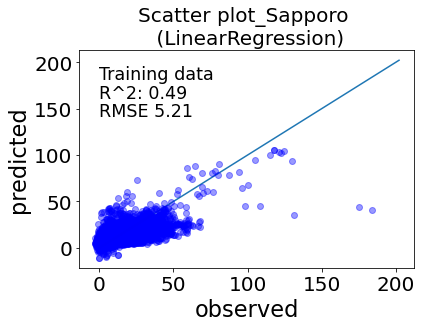

Train set score (R^2): 0.49
[PM2.5] RMSE 5.21


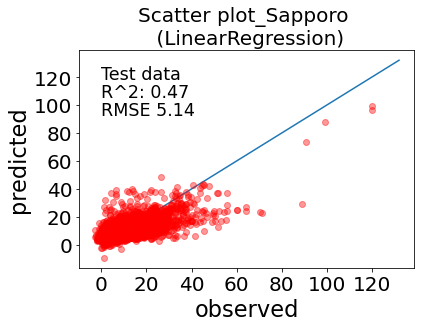

Test set score (R^2): 0.47
[PM2.5] RMSE 5.14


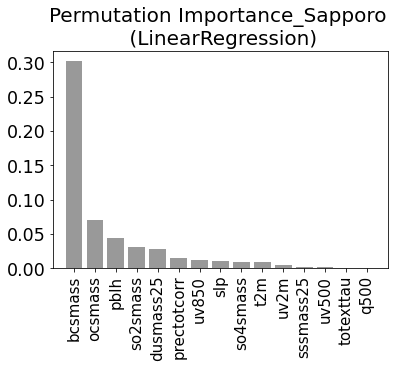

In [20]:
model_name = 'LinearRegression'
sub_info = 'selected_vars'
n_features = n_features
model = LinearRegression()
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)
#model.coef_, model.intercept_

In [21]:
xx.columns

Index(['totexttau', 'bcsmass', 'ocsmass', 'dusmass25', 'sssmass25', 'so4smass',
       'so2smass', 't2m', 'q500', 'uv2m', 'uv850', 'uv500', 'slp', 'pblh',
       'prectotcorr'],
      dtype='object')

In [22]:
nz_idx = np.nonzero(model.coef_)[0]
nz_coefs = pd.Series(model.coef_[nz_idx], index=list(xx.columns[nz_idx]))
nz_coefs.sort_values(ascending=False)

bcsmass        2.842535
ocsmass        1.378730
pblh           1.018730
so2smass       0.886529
dusmass25      0.857553
uv850          0.611728
so4smass       0.565083
t2m            0.472547
slp            0.462845
sssmass25      0.257529
totexttau      0.104194
q500           0.090610
uv500         -0.157318
uv2m          -0.329344
prectotcorr   -0.628170
dtype: float64

# Lasso

model Lasso(alpha=0.1, max_iter=100, tol=1e-06)
fitting a model


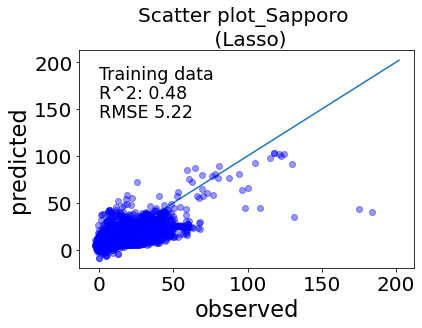

Train set score (R^2): 0.48
[PM2.5] RMSE 5.22


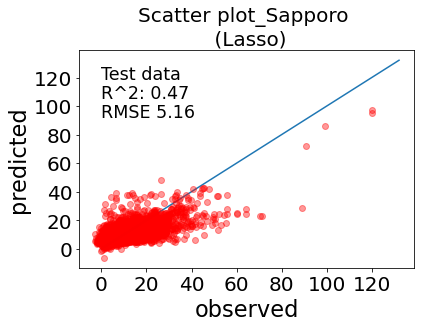

Test set score (R^2): 0.47
[PM2.5] RMSE 5.16


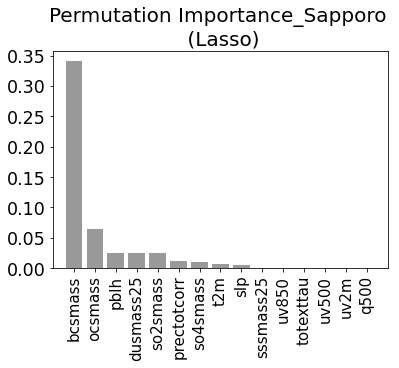

In [23]:
model_name = 'Lasso'
sub_info = 'selected_vars'
n_features = n_features
model = Lasso(alpha = 0.1, max_iter = 100, tol = 0.000001)
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)

In [24]:
xx.columns

Index(['totexttau', 'bcsmass', 'ocsmass', 'dusmass25', 'sssmass25', 'so4smass',
       'so2smass', 't2m', 'q500', 'uv2m', 'uv850', 'uv500', 'slp', 'pblh',
       'prectotcorr'],
      dtype='object')

In [25]:
nz_idx = np.nonzero(model.coef_)[0]
nz_coefs = pd.Series(model.coef_[nz_idx], index=list(xx.columns[nz_idx]))
nz_coefs.sort_values(ascending=False)

bcsmass        2.974539
ocsmass        1.266330
dusmass25      0.766787
pblh           0.731263
so2smass       0.731222
so4smass       0.522650
t2m            0.341820
slp            0.251031
sssmass25      0.164404
uv850          0.147609
totexttau      0.036021
prectotcorr   -0.512475
dtype: float64

In [26]:
np.nonzero(model.coef_)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 12, 13, 14], dtype=int64)

# Ridge

model Ridge(alpha=10, max_iter=100)
fitting a model


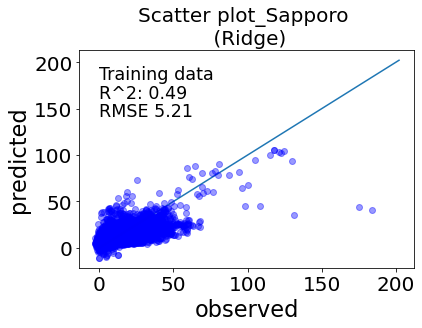

Train set score (R^2): 0.49
[PM2.5] RMSE 5.21


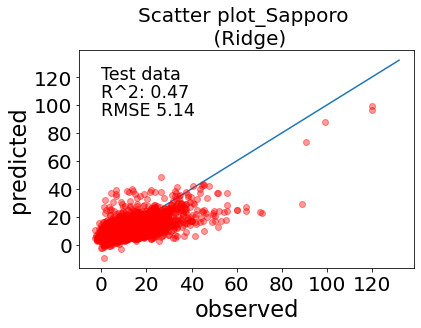

Test set score (R^2): 0.47
[PM2.5] RMSE 5.14


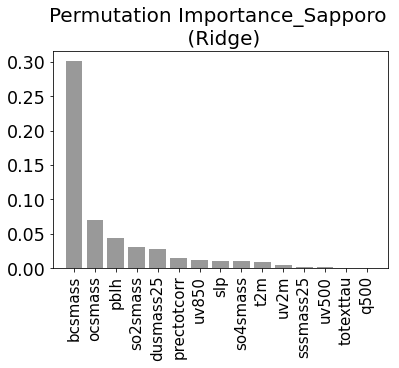

In [27]:
model_name = 'Ridge'
sub_info = 'selected_vars'
n_features = n_features
model = Ridge(alpha = 10, max_iter = 100, tol = 0.001)
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)

In [28]:
xx.columns

Index(['totexttau', 'bcsmass', 'ocsmass', 'dusmass25', 'sssmass25', 'so4smass',
       'so2smass', 't2m', 'q500', 'uv2m', 'uv850', 'uv500', 'slp', 'pblh',
       'prectotcorr'],
      dtype='object')

In [29]:
nz_idx = np.nonzero(model.coef_)[0]
nz_coefs = pd.Series(model.coef_[nz_idx], index=list(xx.columns[nz_idx]))
nz_coefs.sort_values(ascending=False)

bcsmass        2.838665
ocsmass        1.380499
pblh           1.017682
so2smass       0.887923
dusmass25      0.857471
uv850          0.610941
so4smass       0.565927
t2m            0.472129
slp            0.462564
sssmass25      0.257475
totexttau      0.104611
q500           0.090471
uv500         -0.156911
uv2m          -0.328984
prectotcorr   -0.627969
dtype: float64

# ExtraTreesRegressor

model ExtraTreesRegressor(bootstrap=True, max_depth=15, max_features=None,
                    n_estimators=200, random_state=0)
fitting a model


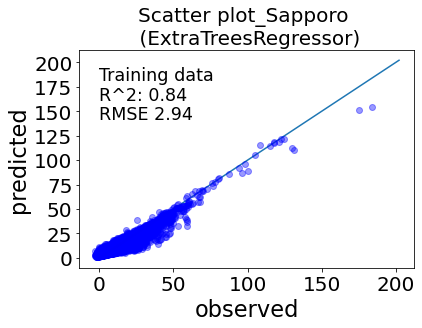

Train set score (R^2): 0.84
[PM2.5] RMSE 2.94


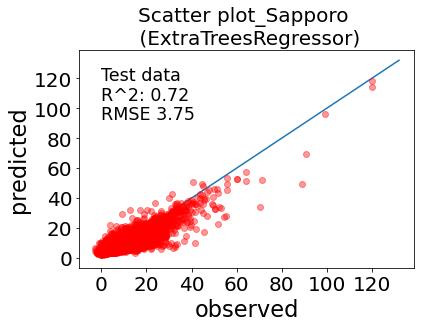

Test set score (R^2): 0.72
[PM2.5] RMSE 3.75


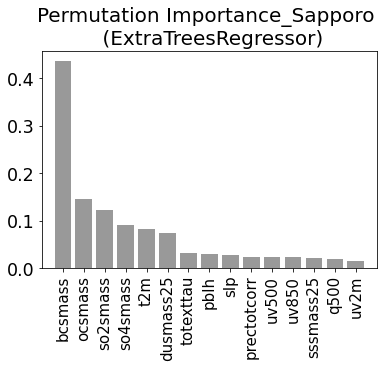

In [30]:
model_name = 'ExtraTreesRegressor'
sub_info = 'selected_vars'
n_features = n_features
model = ExtraTreesRegressor(bootstrap = True, max_depth = 15, max_features = None, n_estimators = 200, random_state = 0)
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)

# RandomForestRegressor

model RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=200,
                      random_state=0)
fitting a model


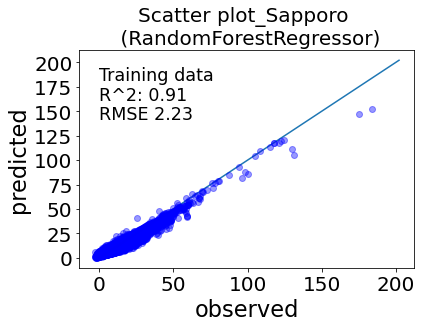

Train set score (R^2): 0.91
[PM2.5] RMSE 2.23


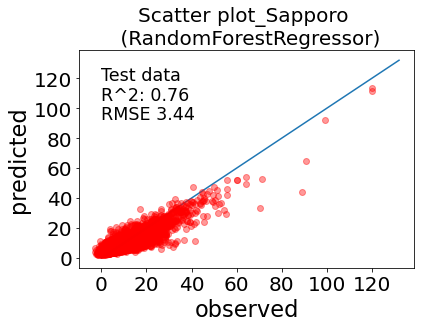

Test set score (R^2): 0.76
[PM2.5] RMSE 3.44


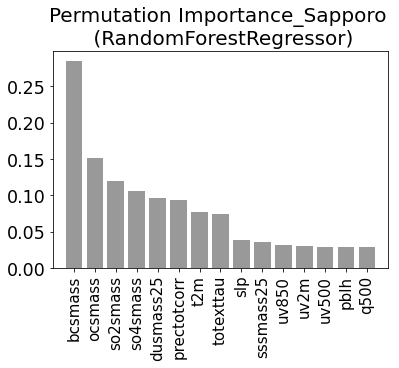

In [31]:
model_name = 'RandomForestRegressor'
sub_info = 'selected_vars'
n_features = n_features
model = RandomForestRegressor(bootstrap = True, max_depth = 15, max_features = 'sqrt', n_estimators = 200, random_state = 0)
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)

# GradientBoostingRegressor

model GradientBoostingRegressor(n_estimators=200, random_state=0)
fitting a model


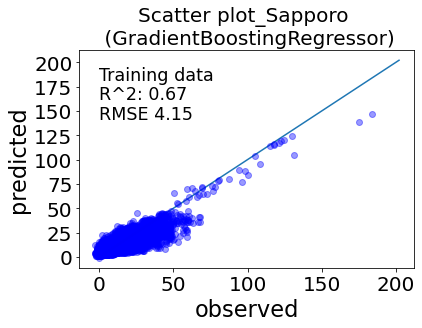

Train set score (R^2): 0.67
[PM2.5] RMSE 4.15


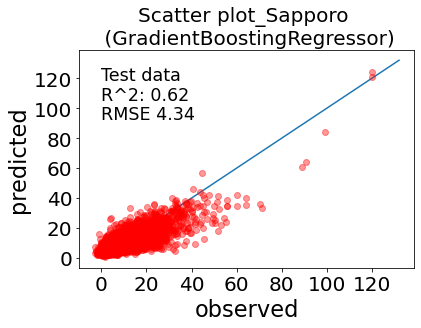

Test set score (R^2): 0.62
[PM2.5] RMSE 4.34


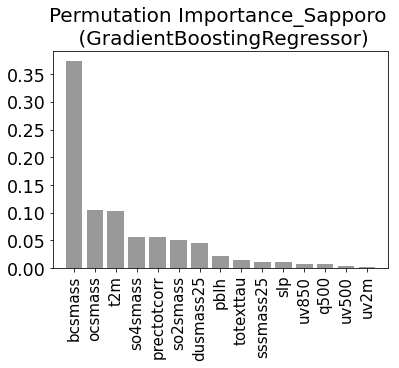

In [32]:
model_name = 'GradientBoostingRegressor'
sub_info = 'selected_vars'
n_features = n_features
model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, max_features = None, n_estimators = 200, random_state = 0)
prediction('PM2.5', yy, xx, model, model_name, sub_info, n_features, feature_plot=True)